<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [103]:
edu = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [104]:
edu.dropna(subset = ["AVG_MATH_4_SCORE"], inplace =True)
edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **Math 4 grade** 

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [105]:
len(edu["YEAR"].unique())

13

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [106]:
# highest avg math grade 4
# does this mean highest value of all the years or
# highest taking into account all the years to find the mean
# im assuming the latter
mich_mean = np.mean(edu[edu["STATE"]=="MICHIGAN"]["AVG_MATH_4_SCORE"])
ohio_mean = np.mean(edu[edu["STATE"]=="OHIO"]["AVG_MATH_4_SCORE"])
print("michigan mean: " + str(mich_mean) + ", ohio: "+str(ohio_mean))
# these results are devastating

michigan mean: 234.36363636363637, ohio: 239.45454545454547


Find the average for your predictor score across all states in 2019

In [107]:
np.mean(edu["AVG_MATH_4_SCORE"])

236.32743362831857

Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [108]:
edu["AVG_MATH_4_SCORE"].max()

253.0

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [109]:
edu["EXPEN_PER_STUDENT"] = edu["TOTAL_REVENUE"]/edu["GRADES_ALL_G"]

Final feature list: **<EXPEN_PER_STUDENT, AVG_MATH_4_SCORE, LOCAL_REV_PER_STUDENT\>**

Feature selection justification: Zip code is often the defining feature of a student's education, because a student's zipcode will determine the amount of local funding their school receives, and the amount of funding a school has is closely connected to the quality of education in the public school system

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0, 0.5, 'average math score for grade 4 students')

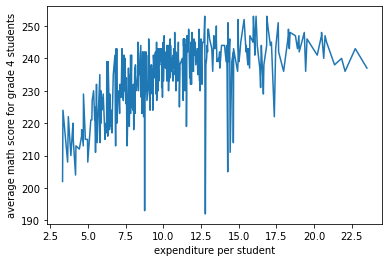

In [110]:
edu.groupby('EXPEN_PER_STUDENT').AVG_MATH_4_SCORE.median().plot()
plt.xlabel("expenditure per student")
plt.ylabel("average math score for grade 4 students")

**generally, as spending per student increases, the average math score for grade 4 students increases**

**Visualization 2**

<AxesSubplot:xlabel='EXPEN_PER_STUDENT', ylabel='AVG_MATH_4_SCORE'>

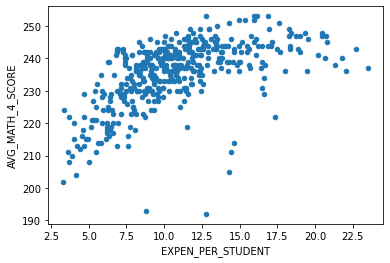

In [111]:
edu.plot.scatter(x="EXPEN_PER_STUDENT", y="AVG_MATH_4_SCORE")

**generally, as spending per student increases, the average math score for grade 4 students increases**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [112]:
from sklearn.model_selection import train_test_split

In [118]:
X = edu[['EXPEN_PER_STUDENT', 'LOCAL_REVENUE']].dropna()
y = edu["AVG_MATH_4_SCORE"]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **REGRESSION**

In [120]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [121]:
# create your model here
model = LinearRegression()

In [122]:
model.fit(X_train, y_train)

LinearRegression()

In [123]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'AVG_MATH_4_SCORE')

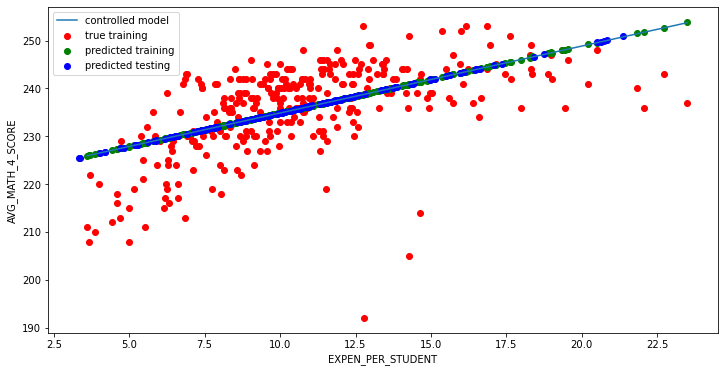

In [128]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "EXPEN_PER_STUDENT"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("AVG_MATH_4_SCORE")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**
In this checkpoint, I analyzed and predicted data from a dataset comparing K-12 financial, enrollment, and achievement data. i used this information to create a model to predict the correlation between the average math score of grade 4 students versus the expenditure per student. the model roughly predicted that as schools spend more, 4th grade students 